In [46]:
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import tmdbsimple as tmdb
from imdb import IMDb
import numpy as np
import pandas as pd
import time
import cPickle as pickle
import io

In [47]:
tmdb.API_KEY = 'c12463ab60c8ecbcb76acc7f9f177d19'
imdb_a = IMDb(accessSystem='http')

In [48]:
years = xrange(2016,2017)
pages = xrange(1,9)
year_pagetxt = {}
for year in years: 
    pagestext = {}
    for page in pages: 
        r = requests.get("http://www.boxofficemojo.com/yearly/chart/?page=%s&view=releasedate&view2=domestic&yr=%s&p=.htm"%(page, year))
        pagestext[page] = r.text
#         time.sleep(1) 
    year_pagetxt[year] = pagestext

In [49]:
mojoData = list() 
mojoatt = ['rank', 'title', 'studio', 'gross', 'gross theaters', 'opening', 'opening theaters', 'open', 'close']
for year in years: 
    for page in pages: 
        soup = BeautifulSoup(year_pagetxt[year][page], "html.parser")
        rows = soup.find_all("font", attrs={'size':'2'})
        start = 10         
        for i in range(start,len(rows)-2, 9):
            t = rows[i].get_text()
            if unicode('Summary of') in t: 
                break
            movie_item = dict() 
            movie_item['year'] = year            
            for at in range(9):
                t = rows[i + at].get_text()
                movie_item[mojoatt[at]] = t
            mojoData.append(movie_item)

In [50]:
# remove movie year in title
for movie in mojoData:
    year = ' (' + str(movie['year']) +')'
    if movie['title'][-7:] == year:
        movie['title'] = movie['title'][:-7]

In [51]:
len(mojoData)

735

In [52]:
search = tmdb.Search()

In [53]:
ListMovieWY = list()
for movie in mojoData:
    q = movie['title']
    response = search.movie(query=q)    
    for s in search.results:
        if s['release_date'].split('-')[0] == str(movie['year']):
            movie['tmdb_id'] = s['id']
            continue
    if 'tmdb_id' not in movie:
        ListMovieWY.append(movie['title'])

In [54]:
# remove movie not found in themoviedb.org 
# wrong release date
mojoDatar = [movie for movie in mojoData if 'tmdb_id' in movie]

In [55]:
len(mojoDatar)

506

In [56]:
MovieDict = dict()
ErrorMovieList = list()
count = 0
for movie in mojoDatar:
    count += 1
    print count
    try:
        moviet = tmdb.Movies(movie['tmdb_id'])
        movieID = moviet.id
        response = moviet.info()
        moviei = imdb_a.get_movie(moviet.imdb_id[2:])
        MovieDict[movieID] = dict()
        MovieDict[movieID]['id'] = movieID
        MovieDict[movieID]['name'] = moviet.title
        MovieDict[movieID]['imdb_id'] = moviet.imdb_id
        MovieDict[movieID]['budget'] = moviet.budget
        MovieDict[movieID]['gross'] = int(movie['gross'][1:].replace(',',''))
        MovieDict[movieID]['opening_gross'] = int(movie['opening'][1:].replace(',',''))
        MovieDict[movieID]['runtime'] = moviet.runtime
        if 'mpaa' in moviei.keys():
            MovieDict[movieID]['mpaa'] = moviei['mpaa']
        else:
            MovieDict[movieID]['mpaa'] = None
            
        if 'rating' in moviei.keys():
            MovieDict[movieID]['imdb_rating'] = moviei['rating']
        else:
            MovieDict[movieID]['imdb_rating'] = None
            
        MovieDict[movieID]['opening_theathers'] = int(movie['opening theaters'].replace(',',''))
        MovieDict[movieID]['year'] = movie['year']
        
        if 'genres' in moviei.keys():
            MovieDict[movieID]['genres'] = moviei['genres']
        else:
            MovieDict[movieID]['genres'] = None
            
        if 'director' in moviei.keys():
            directors = list()
            for u in moviei['director']:
                directors.append(u.personID)
            MovieDict[movieID]['director'] = directors
        else:
            MovieDict[movieID]['director'] = None
            
        if 'cast' in moviei.keys():
            casts = list()
            for u in moviei['cast']:
                casts.append(u.personID)
            MovieDict[movieID]['cast'] = casts
        else:
            MovieDict[movieID]['cast'] = None
            
    except:
        ErrorMovieList.append(movie['tmdb_id'])
        print movie['title']

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


2017-06-30 19:31:46,593 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Jason Bourne
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


2017-06-30 19:35:08,337 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


The Boss
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80


2017-06-30 19:38:35,961 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


The Boy
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112


2017-06-30 19:41:46,867 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Eye in the Sky
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
Batman: The Killing Joke
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190


2017-06-30 19:50:29,974 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


A Aa
191


2017-06-30 19:50:32,243 WARNING [imdbpy.parser.http.urlopener] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py:248: 404 code returned for //akas.imdb.com/title/tt6196731/combined: Not Found (headers: Date: Fri, 30 Jun 2017 12:50:31 GMT
Server: HTTPDaemon
X-Frame-Options: SAMEORIGIN
Cache-Control: private
Content-Type: text/html; charset=iso-8859-1
Set-Cookie: cache=BCYly9LMEPLiBEUF6DZ8WrtVvx6Hsan1C5SG_OiE1tUdnIxZJdiBiFI7hPF-elFKb9UZeQSXGmkzvXBuuI-bJvyXqtSTw27TN_x0tu3ug9i080Y;path=/;domain=.imdb.com
Set-Cookie: uu=BCYln4Zjr0GnDvm8gD_Eo25upR-Hsan1C5SG_OiE1tUdnIxBsEYuK2yEiUQcqQO3IEwp1FQGhwMsvqSRGlWAKjwOwc8fQjAM8djSwZTEHFffZkhD4bb_L4ndR4uLC2QYyk8QrzuzKKWq9eyKWocPBznDyk1hEo6-YENMlOT2uU0OfMNsejJYRMIfjrcekj5Fp1VBlFKWN1d_VYTrp360nAnkQ3Vgm6dagr0a63sCb74yS6YUJpchzE0-nZvjQcktR3NihXcO4_1TaR6OX8eN8jgyGALMbNRdJTwrMF6f1ilJV7-fdnkbyv1fpdlQw7AbHf5l1-cU9jG00TzNCcPxX1BXig;expires=Thu, 30 Dec 2037 00:00:00 GMT;path=/;domain=.imdb.com
Set-Cookie: cache=BCYqf1Alh

192
193
194
195
196
197
198
199
200
201
202
To Joey, with Love
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
The Insanity of God
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
31
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
Minimalism: A Documentary About the Important Things
281
Yo-kai Watch: The Movie
282
283
284
285
286
287
288
289
Seed: The Untold Story
290


2017-06-30 20:01:35,092 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Kaptaan
291
292
293
294
295
296
Viva
297
298
299
300


2017-06-30 20:02:40,754 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


De Palma
301
302
303
304
305
306
307
308


2017-06-30 20:03:31,700 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


ISM
309
310


2017-06-30 20:03:36,610 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


A War
311
312


2017-06-30 20:03:42,536 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Three
313
314
315
316
317
318
319
Dictator
320
321
322
Tower
323


2017-06-30 20:04:43,802 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Rock On 2
324
325
326
327
328
329
330
331
332
For the Love of Spock
333
334
335
336
337
338
339
340
341
342
343
The Tenth Man
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358


2017-06-30 20:07:56,418 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Clown
359
360
361
362
363
My Annoying Brother
364
The Unknowns
365
366
367
368
369
Dawson City: Frozen Time
370
371
372
A Melody to Remember
373


2017-06-30 20:09:31,574 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Nuts!
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
The Son of Joseph
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
Hunter Gatherer
420
421
422
423
424
425
426
427
428
429
430
431
432
433
On The Map
434
Colonia
435
436
437
438
Argentina
439
Remember You
440


2017-06-30 20:15:38,408 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Lamb
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461


2017-06-30 20:17:43,727 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Chosen
462
Hooligan Sparrow
463
464
465


2017-06-30 20:18:02,484 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Magnus
466


2017-06-30 20:18:03,655 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "4485966/": invalid literal for int() with base 10: \'4485966/\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: '4485966/'


The Last King
467
468
469
470
471
472
The President
473
474
475
476
477
Boom Bust Boom
478
479
480
481
482
Slash
483
484
485
486
487
488
On Meditation
489
490
491
The Last Film Festival
492
493
494
495
496
497
498
In Her Name (Au nom de ma fille)
499
500
Level Up
501
502
503
504
Hannah: Buddhism's Untold Journey
505
506


In [57]:
pickle.dump(MovieDict, io.open('MovieData111_16.pkl', 'wb'))

In [58]:
MovieTable1 = pd.read_pickle('MovieData_16.pkl')

In [59]:
MDdf = pd.DataFrame(MovieTable1).transpose()

In [60]:
MDdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 58431 to 462436
Data columns (total 14 columns):
budget               478 non-null object
cast                 434 non-null object
director             446 non-null object
genres               449 non-null object
gross                478 non-null object
id                   478 non-null object
imdb_id              478 non-null object
imdb_rating          436 non-null object
mpaa                 244 non-null object
name                 478 non-null object
opening_gross        451 non-null object
opening_theathers    451 non-null object
runtime              448 non-null object
year                 451 non-null object
dtypes: object(14)
memory usage: 56.0+ KB


In [31]:
MDdf.head()

,budget,cast,director,genres,gross,id,imdb_id,imdb_rating,mpaa,name,opening_gross,opening_theathers,runtime,year
189,65000000,"[0000620, 0004695, 0000982, 0330687, 0206257, ...","[0588340, 0001675]","[Action, Crime, Thriller]",13757804,189,tt0458481,6.5,Rated R for strong brutal stylized violence th...,Sin City: A Dame to Kill For,6317683,2894,102,2014
1865,380000000,"[0000136, 0004851, 0001691, 0574534, 0573618, ...",[0551128],"[Action, Adventure, Fantasy]",241071802,1865,tt1298650,6.7,"Rated PG-13 for sexual content/nudity, languag...",Pirates of the Caribbean: On Stranger Tides,90151958,4155,136,2011
1930,215000000,"[1940449, 1297015, 0406975, 0001459, 0000640, ...",[1989536],"[Action, Adventure]",262030663,1930,tt0948470,7,Rated PG-13 for sequences of action and violence,The Amazing Spider-Man,62004688,4318,136,2012
4258,20000000,"[0864308, 0005350, 3856188, 4795991, 5777210, ...","[0002700, 0001878]",[Comedy],32015787,4258,tt0795461,3.5,Rated PG-13 for crude and sexual content throu...,Scary Movie 5,14157367,3402,86,2013
7978,150000000,"[0581163, 2247629, 1289434, 0001125, 3785649, ...",[0002653],"[Drama, Fantasy, Horror, Thriller]",61979680,7978,tt0780653,5.8,Rated R for bloody horror violence and gore,The Wolfman,31479235,3222,102,2010


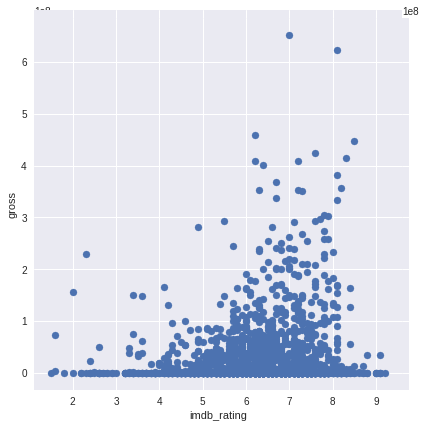

In [32]:
MD_rate_gross = MDdf[['gross', 'imdb_rating']]
MD_rate_gross = MD_rate_gross[MD_rate_gross.imdb_rating.notnull()]
grid = sns.JointGrid(MD_rate_gross.imdb_rating, MD_rate_gross.gross, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter)

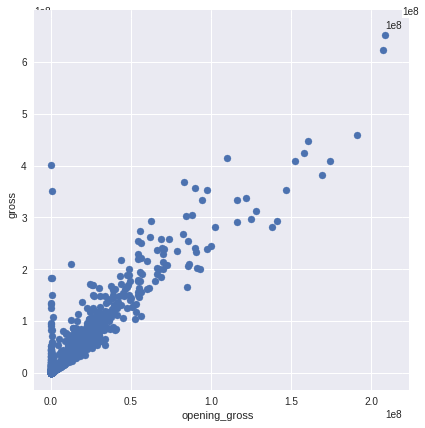

In [33]:
MD_opening_gross = MDdf[['gross', 'opening_gross']]
grid = sns.JointGrid(MD_opening_gross.opening_gross, MD_opening_gross.gross, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter)

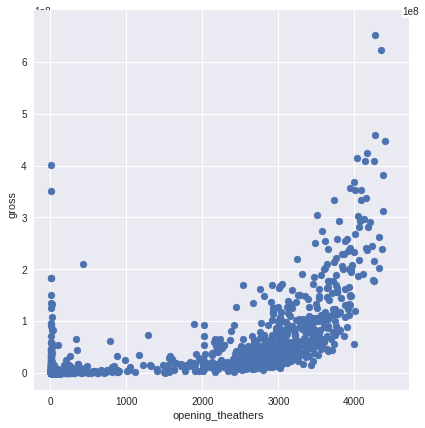

In [34]:
MD_theather_gross = MDdf[['opening_theathers', 'gross']]
grid = sns.JointGrid(MD_theather_gross.opening_theathers, MD_theather_gross.gross, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter)

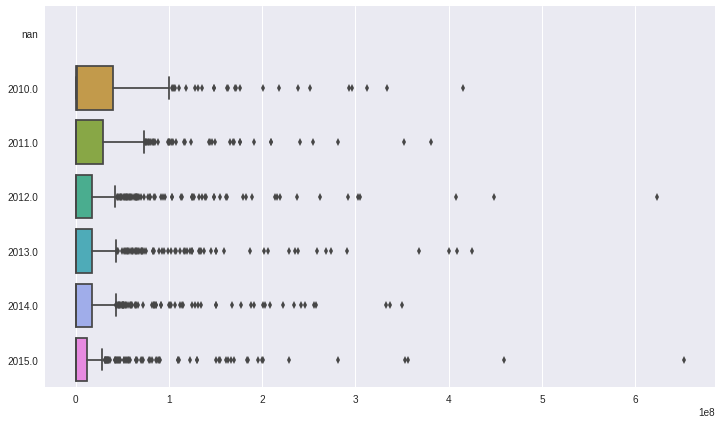

In [35]:
MD_year_gross = MDdf[['year', 'gross']]
dd = dict()
for y in MD_year_gross.year.unique():
    dd[y] = MD_year_gross[MD_year_gross.year == y].gross
dd = pd.DataFrame(dd)
plt.figure(figsize=(12, 7))
sns.boxplot(dd,orient="h")

In [36]:
MD_genre_gross = MDdf[['genres', 'gross']]

In [37]:
genres_list = list()
for gl in MD_genre_gross.genres.get_values():
    if gl == None:
        continue
    for g in gl:
        if g not in genres_list:
            genres_list.append(g)

TypeError: 'float' object is not iterable

In [38]:
dd = dict()
for g in genres_list:
    tl = list()
    for gg in MD_genre_gross.genres:
        if gg == None:
            tl.append(False)
        else:
            tl.append(g in gg)
    dd[g] = MD_genre_gross[tl].gross
dd = pd.DataFrame(dd)
plt.figure(figsize=(15, 10))
sns.boxplot(dd,orient="h")

TypeError: argument of type 'float' is not iterable

In [39]:
plt.figure(figsize=(15, 10))

In [40]:
plt.show()